<a href="https://colab.research.google.com/github/pravin-raut/TimeSeries_USD-EUR_WithOilImpact/blob/Master/01_Currency_%26_Oil_Forecast_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
!pip install pmdarima
!pip install quandl
!pip install yfinance

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime,timedelta
import json
import quandl

In [128]:
import urllib.request

file_path = "https://raw.githubusercontent.com/pravin-raut/MachineLearning/Master/dissertation/Config/Config_Git.json"

with urllib.request.urlopen(file_path) as infile:
  data = json.load(infile)

  api_key=data["nasdaq"]["api_key"]
quandl.ApiConfig.api_key = api_key


In [129]:
FirstDay='2019-01-01'
LastDay='2023-07-10'

In [130]:

def getDataFromAPI(API,symbol,start_date,end_date):

  if API=="YFinance":
    # Create a ticker object
    ticker = yf.Ticker(symbol)
    # Download historical data
    data = ticker.history(period="1d", start=start_date, end=end_date)

  if API=="Nasdaq":
    data = quandl.get(symbol,start_date=start_date,end_date=end_date)


  return data

# Reading Opec Oil Data from Nasdaq


In [131]:
df_Oil_InUSD=getDataFromAPI("Nasdaq","OPEC/ORB",FirstDay,LastDay).reset_index()
df_Oil_InUSD['Date'] = pd.to_datetime(df_Oil_InUSD['Date']).dt.date
df_Oil_InUSD.set_index('Date', inplace=True)
df_Oil_InUSD.head()

,Value
Date,
2019-01-02,52.14
2019-01-03,52.93
2019-01-04,55.13
2019-01-07,56.42
2019-01-08,56.09


In [132]:
df_Oil_InUSD.describe()

,Value
count,1167.000000
mean,70.059109
std,22.035968
min,12.220000
25%,59.460000
50%,68.840000
75%,82.045000
max,128.270000


In [133]:
df_Oil_InUSD.isnull().sum()

Value    0
dtype: int64

In [134]:
df_Oil_InUSD=df_Oil_InUSD.asfreq('b')


In [135]:
df_Oil_InUSD.isnull().sum()

Value    12
dtype: int64

In [136]:
df_Oil_InUSD['Actual_Oil_Price_t']=df_Oil_InUSD.Value.fillna(method='bfill')
df_Oil_InUSD=df_Oil_InUSD[['Actual_Oil_Price_t']]
df_Oil_InUSD.isnull().sum()

Actual_Oil_Price_t    0
dtype: int64

In [137]:
df_Oil_InUSD.tail(5)

,Actual_Oil_Price_t
Date,
2023-07-04,76.18
2023-07-05,76.61
2023-07-06,77.56
2023-07-07,78.43
2023-07-10,79.09


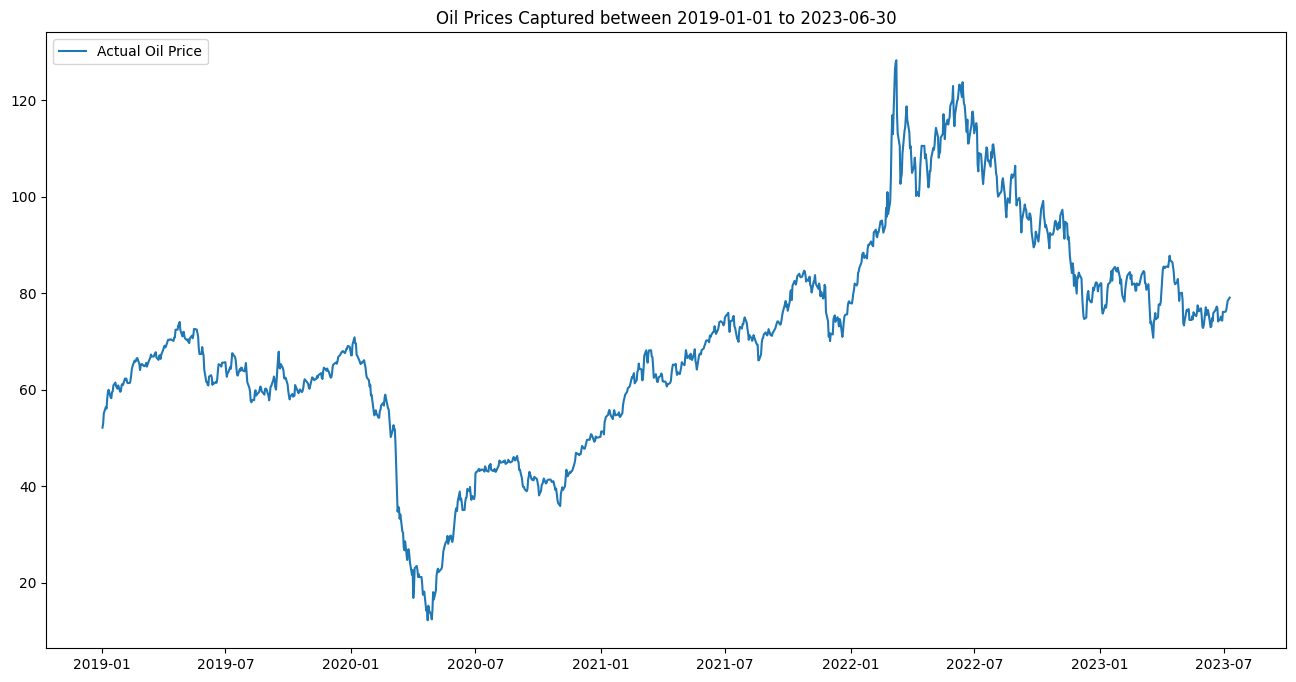

In [138]:
plt.figure(figsize=(16,8))
plt.plot(df_Oil_InUSD['Actual_Oil_Price_t'],label="Actual Oil Price")
plt.title("Oil Prices Captured between 2019-01-01 to 2023-06-30")
plt.legend(loc="upper left")
plt.show()


In [139]:
df_USD_EUR=getDataFromAPI("YFinance","EURUSD=X",FirstDay,LastDay).reset_index()
df_USD_EUR['Date'] = pd.to_datetime(df_USD_EUR['Date']).dt.date
df_USD_EUR.set_index('Date', inplace=True)
df_USD_EUR.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-01,1.149425,1.155001,1.146500,1.149306,0,0.0,0.0
2019-01-02,1.146132,1.149700,1.134572,1.146171,0,0.0,0.0
2019-01-03,1.131734,1.140914,1.131734,1.131811,0,0.0,0.0
2019-01-04,1.139095,1.141774,1.134816,1.139108,0,0.0,0.0
2019-01-07,1.141292,1.147447,1.140524,1.141044,0,0.0,0.0
2019-01-08,1.147934,1.148633,1.142465,1.147974,0,0.0,0.0
2019-01-09,1.145725,1.154015,1.144165,1.145607,0,0.0,0.0
2019-01-10,1.155522,1.157140,1.151145,1.155495,0,0.0,0.0
2019-01-11,1.151517,1.153900,1.145974,1.151013,0,0.0,0.0


In [140]:
df_USD_EUR[['Close']].describe()

,Close
count,1178.000000
mean,1.119770
std,0.057962
min,0.959619
25%,1.085891
50%,1.119827
75%,1.170186
max,1.234111


In [141]:
df_USD_EUR.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [142]:
df_USD_EUR=df_USD_EUR.asfreq('b')

df_USD_EUR.Close.isnull().sum()

1

In [143]:
df_USD_EUR.Close=df_USD_EUR.Close.fillna(method='bfill')


In [144]:
df_USD_EUR['Actual_USD_EUR_Price_t']=df_USD_EUR[['Close']]
df_USD_EUR=df_USD_EUR[['Actual_USD_EUR_Price_t']]
df_USD_EUR

,Actual_USD_EUR_Price_t
Date,
2019-01-01,1.149306
2019-01-02,1.146171
2019-01-03,1.131811
2019-01-04,1.139108
2019-01-07,1.141044
...,...
2023-07-03,1.090750
2023-07-04,1.091310
2023-07-05,1.088495


In [145]:
df_USD_EUR.isnull().sum()

Actual_USD_EUR_Price_t    0
dtype: int64

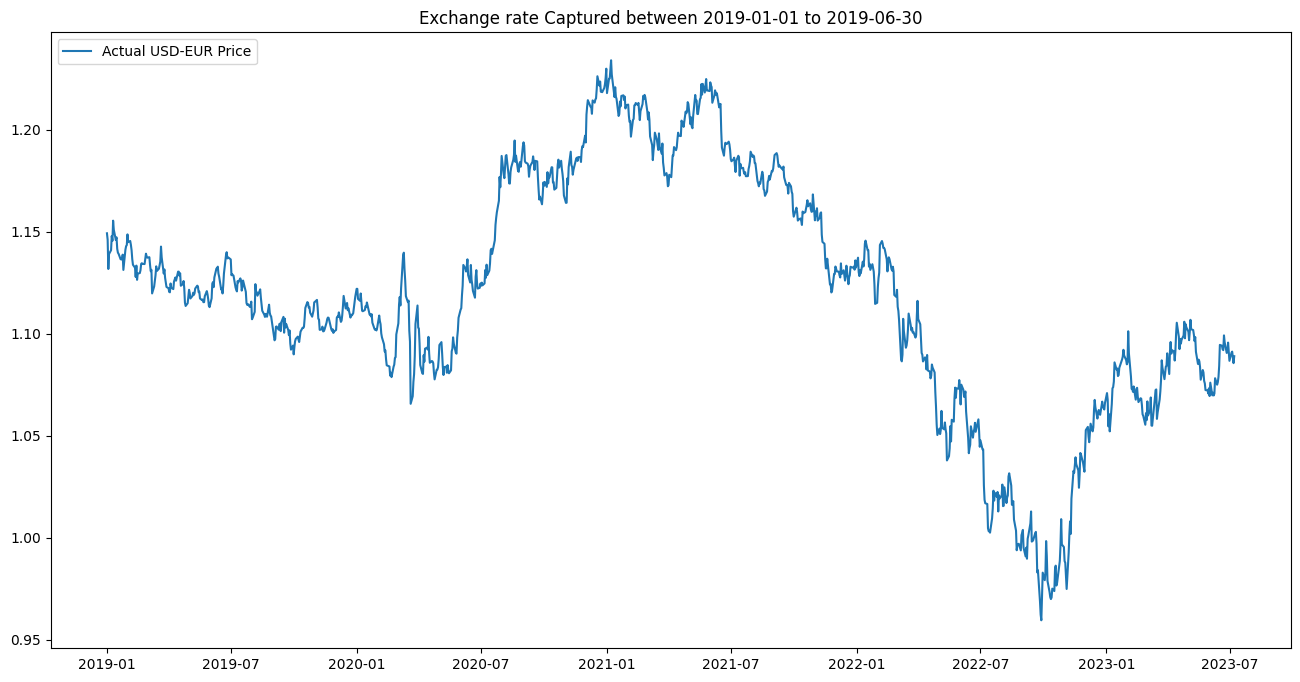

In [146]:
plt.figure(figsize=(16,8))
plt.plot(df_USD_EUR['Actual_USD_EUR_Price_t'],label="Actual USD-EUR Price")
plt.title("Exchange rate Captured between 2019-01-01 to 2019-06-30")
plt.legend(loc="upper left")
plt.show()


In [147]:
def compare_plots(col1, col2, label1, label2, title):
    plt.figure(figsize=(16,8))
    plt.plot(col1,label=label1)
    plt.plot(col2,label=label2)
    plt.title(title)
    plt.legend(loc="upper left")
    plt.show()


In [148]:
import matplotlib.pyplot as plt
import pandas as pd

df_USD_EUR['USD_EUR_Price_standardized'] = (df_USD_EUR['Actual_USD_EUR_Price_t'] - df_USD_EUR['Actual_USD_EUR_Price_t'].mean()) / df_USD_EUR['Actual_USD_EUR_Price_t'].std()
df_Oil_InUSD['Oil_Price_standardized'] = (df_Oil_InUSD['Actual_Oil_Price_t'] - df_Oil_InUSD['Actual_Oil_Price_t'].mean()) / df_Oil_InUSD['Actual_Oil_Price_t'].std()



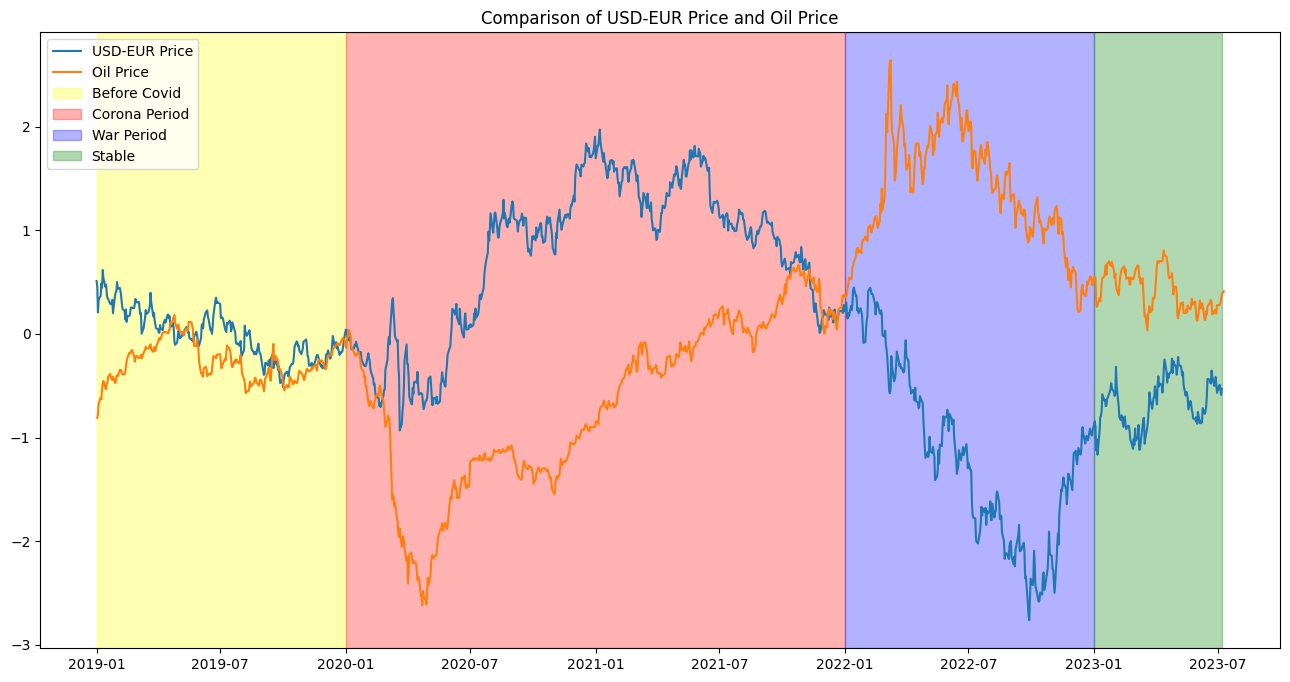

In [175]:
plt.figure(figsize=(16,8))
plt.plot(df_USD_EUR['USD_EUR_Price_standardized'], label="USD-EUR Price")
plt.plot(df_Oil_InUSD['Oil_Price_standardized'], label="Oil Price")
plt.axvspan(df_USD_EUR.index.min(), pd.to_datetime('2020-01-01'), color='yellow', alpha=0.3, label='Before Covid')
plt.axvspan(pd.to_datetime('2020-01-01'), pd.to_datetime('2022-01-01'), color='red', alpha=0.3, label='Corona Period')
# War period
plt.axvspan(pd.to_datetime('2022-01-01'), pd.to_datetime('2023-01-01'), color='blue', alpha=0.3, label='War Period')
# Stable
plt.axvspan(pd.to_datetime('2023-01-01'), df_USD_EUR.index.max(), color='green', alpha=0.3, label='Stable')
plt.title('Comparison of USD-EUR Price and Oil Price')
plt.legend(loc="upper left")

plt.show()



In [152]:
def generate_shift_columns_back(df, column_name, min_shift, max_shift, suffix=None):
    if suffix:
        base_name = column_name.split(suffix)[0] # Obtain the base column name
        for i in range(min_shift, max_shift + 1):
            new_col_name = f'{base_name}-{i}{suffix}'
            df[new_col_name] = df[column_name].shift(i)
    else:
        for i in range(min_shift, max_shift + 1):
            df[f'{column_name}-{i}'] = df[column_name].shift(i)
    return df


In [153]:
def generate_shift_columns_front(df, column_name, min_shift, max_shift, suffix=None):
    if suffix:
        base_name = column_name.split(suffix)[0] # Obtain the base column name
        for i in range(min_shift, max_shift + 1):
            new_col_name = f'{base_name}+{i}{suffix}'
            df[new_col_name] = df[column_name].shift(-i)
            print(new_col_name)
    else:
        for i in range(min_shift, max_shift + 1):
            df[f'{column_name}+{i}'] = df[column_name].shift(-i)
    return df


In [154]:
df_oil_currency = df_Oil_InUSD.join(df_USD_EUR, how='inner')
df_oil_currency

,Actual_Oil_Price_t,Oil_Price_standardized,Actual_USD_EUR_Price_t,USD_EUR_Price_standardized
Date,,,,
2019-01-02,52.14,-0.810091,1.146171,0.455745
2019-01-03,52.93,-0.774277,1.131811,0.207882
2019-01-04,55.13,-0.674544,1.139108,0.333831
2019-01-07,56.42,-0.616064,1.141044,0.367258
2019-01-08,56.09,-0.631024,1.147974,0.486857
...,...,...,...,...
2023-07-03,76.12,0.277001,1.090750,-0.500815
2023-07-04,76.18,0.279721,1.091310,-0.491159
2023-07-05,76.61,0.299215,1.088495,-0.539750


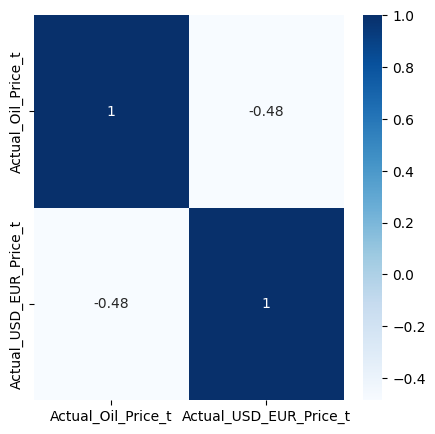

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that df is your DataFrame

columns_of_interest = ['Actual_Oil_Price_t','Actual_USD_EUR_Price_t']

# Calculate the correlation matrix
corr = df_oil_currency[columns_of_interest].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))


# Draw the heatmap with correct aspect ratio
sns.heatmap(corr,   annot=True,cmap='Blues')

plt.show()


In [155]:
generate_shift_columns_back(df_oil_currency, 'Actual_USD_EUR_Price_t', 1, 4)
generate_shift_columns_back(df_oil_currency, 'Actual_Oil_Price_t', 1, 4)
generate_shift_columns_front(df_oil_currency, 'Actual_USD_EUR_Price_t', 1, 5)
generate_shift_columns_front(df_oil_currency, 'Actual_Oil_Price_t', 1, 5)
df_oil_currency

,Actual_Oil_Price_t,Oil_Price_standardized,Actual_USD_EUR_Price_t,USD_EUR_Price_standardized,Actual_USD_EUR_Price_t-1,Actual_USD_EUR_Price_t-2,Actual_USD_EUR_Price_t-3,Actual_USD_EUR_Price_t-4,Actual_Oil_Price_t-1,Actual_Oil_Price_t-2,...,Actual_USD_EUR_Price_t+1,Actual_USD_EUR_Price_t+2,Actual_USD_EUR_Price_t+3,Actual_USD_EUR_Price_t+4,Actual_USD_EUR_Price_t+5,Actual_Oil_Price_t+1,Actual_Oil_Price_t+2,Actual_Oil_Price_t+3,Actual_Oil_Price_t+4,Actual_Oil_Price_t+5
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,52.14,-0.810091,1.146171,0.455745,NaN,NaN,NaN,NaN,NaN,NaN,...,1.131811,1.139108,1.141044,1.147974,1.145607,52.93,55.13,56.42,56.09,58.22
2019-01-03,52.93,-0.774277,1.131811,0.207882,1.146171,NaN,NaN,NaN,52.14,NaN,...,1.139108,1.141044,1.147974,1.145607,1.155495,55.13,56.42,56.09,58.22,59.46
2019-01-04,55.13,-0.674544,1.139108,0.333831,1.131811,1.146171,NaN,NaN,52.93,52.14,...,1.141044,1.147974,1.145607,1.155495,1.151013,56.42,56.09,58.22,59.46,60.00
2019-01-07,56.42,-0.616064,1.141044,0.367258,1.139108,1.131811,1.146171,NaN,55.13,52.93,...,1.147974,1.145607,1.155495,1.151013,1.146014,56.09,58.22,59.46,60.00,58.39
2019-01-08,56.09,-0.631024,1.147974,0.486857,1.141044,1.139108,1.131811,1.146171,56.42,55.13,...,1.145607,1.155495,1.151013,1.146014,1.147289,58.22,59.46,60.00,58.39,58.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03,76.12,0.277001,1.090750,-0.500815,1.086803,1.091584,1.095722,1.091048,76.14,74.34,...,1.091310,1.088495,1.085658,1.089064,NaN,76.18,76.61,77.56,78.43,NaN
2023-07-04,76.18,0.279721,1.091310,-0.491159,1.090750,1.086803,1.091584,1.095722,76.12,76.14,...,1.088495,1.085658,1.089064,NaN,NaN,76.61,77.56,78.43,NaN,NaN
2023-07-05,76.61,0.299215,1.088495,-0.539750,1.091310,1.090750,1.086803,1.091584,76.18,76.12,...,1.085658,1.089064,NaN,NaN,NaN,77.56,78.43,NaN,NaN,NaN


In [156]:
df_oil_currency['Year'] = df_oil_currency.index.year
df_oil_currency['Month'] = df_oil_currency.index.month
df_oil_currency['Day'] = df_oil_currency.index.day
df_oil_currency['DayOfWeek'] = df_oil_currency.index.dayofweek
df_oil_currency

,Actual_Oil_Price_t,Oil_Price_standardized,Actual_USD_EUR_Price_t,USD_EUR_Price_standardized,Actual_USD_EUR_Price_t-1,Actual_USD_EUR_Price_t-2,Actual_USD_EUR_Price_t-3,Actual_USD_EUR_Price_t-4,Actual_Oil_Price_t-1,Actual_Oil_Price_t-2,...,Actual_USD_EUR_Price_t+5,Actual_Oil_Price_t+1,Actual_Oil_Price_t+2,Actual_Oil_Price_t+3,Actual_Oil_Price_t+4,Actual_Oil_Price_t+5,Year,Month,Day,DayOfWeek
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,52.14,-0.810091,1.146171,0.455745,NaN,NaN,NaN,NaN,NaN,NaN,...,1.145607,52.93,55.13,56.42,56.09,58.22,2019,1,2,2
2019-01-03,52.93,-0.774277,1.131811,0.207882,1.146171,NaN,NaN,NaN,52.14,NaN,...,1.155495,55.13,56.42,56.09,58.22,59.46,2019,1,3,3
2019-01-04,55.13,-0.674544,1.139108,0.333831,1.131811,1.146171,NaN,NaN,52.93,52.14,...,1.151013,56.42,56.09,58.22,59.46,60.00,2019,1,4,4
2019-01-07,56.42,-0.616064,1.141044,0.367258,1.139108,1.131811,1.146171,NaN,55.13,52.93,...,1.146014,56.09,58.22,59.46,60.00,58.39,2019,1,7,0
2019-01-08,56.09,-0.631024,1.147974,0.486857,1.141044,1.139108,1.131811,1.146171,56.42,55.13,...,1.147289,58.22,59.46,60.00,58.39,58.24,2019,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03,76.12,0.277001,1.090750,-0.500815,1.086803,1.091584,1.095722,1.091048,76.14,74.34,...,NaN,76.18,76.61,77.56,78.43,NaN,2023,7,3,0
2023-07-04,76.18,0.279721,1.091310,-0.491159,1.090750,1.086803,1.091584,1.095722,76.12,76.14,...,NaN,76.61,77.56,78.43,NaN,NaN,2023,7,4,1
2023-07-05,76.61,0.299215,1.088495,-0.539750,1.091310,1.090750,1.086803,1.091584,76.18,76.12,...,NaN,77.56,78.43,NaN,NaN,NaN,2023,7,5,2


In [177]:
from statsmodels.tsa.stattools import grangercausalitytests

# Specify the maximum number of lags that you are interested in
maxlag=12

# Run the test. The second argument to `grangercausalitytests` is the maximum number of lags to test for
test_result = grangercausalitytests(df_oil_currency[['Actual_Oil_Price_t','Actual_USD_EUR_Price_t']], maxlag)

print('\nGranger Causality')
print('\nGranger Causality')
print('number of lags (no zero) 1st column - F-test p-value, 2nd column - chi2 p-value')
for i in range(1, maxlag+1):
    print('lag: ', i, 'F-test p-value: ', test_result[i][0]['ssr_ftest'][1])



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4141  , p=0.1205  , df_denom=1165, df_num=1
ssr based chi2 test:   chi2=2.4203  , p=0.1198  , df=1
likelihood ratio test: chi2=2.4178  , p=0.1200  , df=1
parameter F test:         F=2.4141  , p=0.1205  , df_denom=1165, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8244  , p=0.4387  , df_denom=1162, df_num=2
ssr based chi2 test:   chi2=1.6559  , p=0.4369  , df=2
likelihood ratio test: chi2=1.6547  , p=0.4372  , df=2
parameter F test:         F=0.8244  , p=0.4387  , df_denom=1162, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3546  , p=0.2552  , df_denom=1159, df_num=3
ssr based chi2 test:   chi2=4.0883  , p=0.2521  , df=3
likelihood ratio test: chi2=4.0811  , p=0.2528  , df=3
parameter F test:         F=1.3546  , p=0.2552  , df_denom=1159, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2629  , p=0.

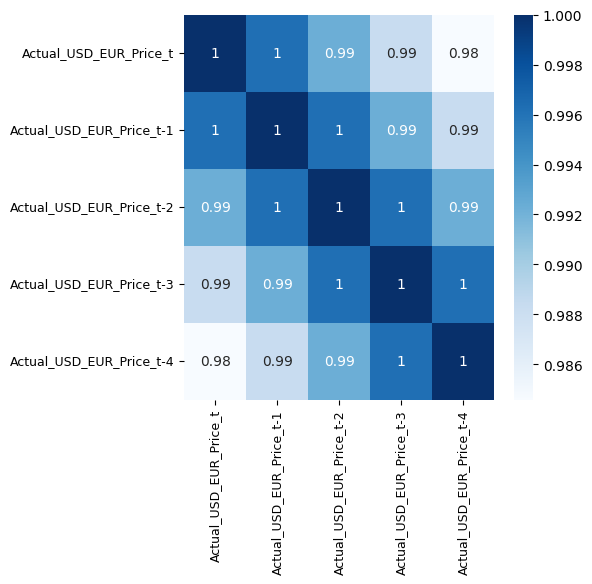

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that df is your DataFrame

columns_of_interest = [col for col in df_oil_currency.columns if col.startswith('Actual_USD_EUR_Price_t-') ]
columns_of_interest.insert(0,'Actual_USD_EUR_Price_t')
# Calculate the correlation matrix
corr = df_oil_currency[columns_of_interest].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Draw the heatmap with correct aspect ratio
sns.heatmap(corr,   annot=True,cmap='Blues')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.show()


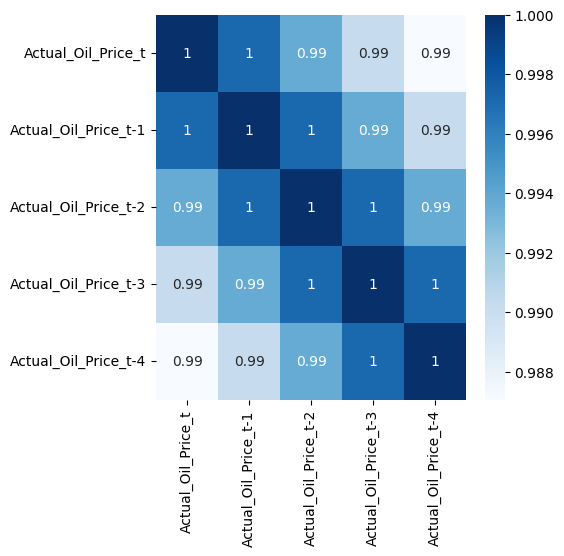

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_of_interest = [col for col in df_oil_currency.columns if col.startswith('Actual_Oil_Price_t-') ]
columns_of_interest.insert(0,'Actual_Oil_Price_t')

# Calculate the correlation matrix
corr = df_oil_currency[columns_of_interest].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))


# Draw the heatmap with correct aspect ratio
sns.heatmap(corr,   annot=True,cmap='Blues')

plt.show()


In [161]:
df_oil_currency.dropna(inplace=True)
df_oil_currency.tail(10)

,Actual_Oil_Price_t,Oil_Price_standardized,Actual_USD_EUR_Price_t,USD_EUR_Price_standardized,Actual_USD_EUR_Price_t-1,Actual_USD_EUR_Price_t-2,Actual_USD_EUR_Price_t-3,Actual_USD_EUR_Price_t-4,Actual_Oil_Price_t-1,Actual_Oil_Price_t-2,...,Actual_USD_EUR_Price_t+5,Actual_Oil_Price_t+1,Actual_Oil_Price_t+2,Actual_Oil_Price_t+3,Actual_Oil_Price_t+4,Actual_Oil_Price_t+5,Year,Month,Day,DayOfWeek
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-19,76.45,0.291961,1.094212,-0.441076,1.094595,1.084305,1.078935,1.076299,75.89,74.20,...,1.090667,76.85,77.24,76.83,74.14,74.65,2023,6,19,0
2023-06-20,76.85,0.310095,1.092430,-0.471818,1.094212,1.094595,1.084305,1.078935,76.45,75.89,...,1.091048,77.24,76.83,74.14,74.65,75.15,2023,6,20,1
2023-06-21,77.24,0.327775,1.092037,-0.478612,1.092430,1.094212,1.094595,1.084305,76.85,76.45,...,1.095722,76.83,74.14,74.65,75.15,74.38,2023,6,21,2
2023-06-22,76.83,0.309188,1.099264,-0.353879,1.092037,1.092430,1.094212,1.094595,77.24,76.85,...,1.091584,74.14,74.65,75.15,74.38,74.34,2023,6,22,3
2023-06-23,74.14,0.187241,1.095890,-0.412100,1.099264,1.092037,1.092430,1.094212,76.83,77.24,...,1.086803,74.65,75.15,74.38,74.34,76.14,2023,6,23,4
2023-06-26,74.65,0.210361,1.090667,-0.502253,1.095890,1.099264,1.092037,1.092430,74.14,76.83,...,1.090750,75.15,74.38,74.34,76.14,76.12,2023,6,26,0
2023-06-27,75.15,0.233028,1.091048,-0.495679,1.090667,1.095890,1.099264,1.092037,74.65,74.14,...,1.091310,74.38,74.34,76.14,76.12,76.18,2023,6,27,1
2023-06-28,74.38,0.198121,1.095722,-0.415001,1.091048,1.090667,1.095890,1.099264,75.15,74.65,...,1.088495,74.34,76.14,76.12,76.18,76.61,2023,6,28,2
2023-06-29,74.34,0.196308,1.091584,-0.486431,1.095722,1.091048,1.090667,1.095890,74.38,75.15,...,1.085658,76.14,76.12,76.18,76.61,77.56,2023,6,29,3


In [185]:
df_oil_currency.to_csv("/content/drive/MyDrive/dissertation/df_oil_currency.csv")